In [31]:
import testing as tst
import impute as imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
nombres_sarima=['tiempo','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
inputs=['time','Direct','Global','Temperatura','Humedad','ws','wd','P','Eg']
nombres_ann=['tiempo','Direct','Global','Difusa','Temperatura','Humedad','Presion']
# nombres_ann=['tiempo','#','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
# sarima_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1_multioneshot.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres_sarima)
sarima_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_0_0_1_1_multioneshot.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres_sarima)
tmx_2018=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/tmx_base_2018_solar_angles.csv',index_col=0,parse_dates=True,names=nombres_sarima,skiprows=1)
ann_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)#('CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')

In [33]:
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')
yearly_sarima2,daily_sarima2,hourly_sarima2=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,0)(0,1,1)')
yearly_ann,daily_ann,hourly_ann=tst.dfmetricas(ann_2018,tmx_2018,'CNN-LSTM')
# yearly_,daily_,hourly_=tst.dfmetricas(_2018,tmx_2018,'SARIMA(')
metricas=['model','E_dmae','E_dmape','mae_Ig']
df_metrics=pd.concat((yearly_ann[metricas],yearly_sarima[metricas],yearly_sarima2),ignore_index=True)
df_metrics[metricas]

,model,E_dmae,E_dmape,mae_Ig
0,CNN-LSTM,530.044127,11.204879,76.355088
1,"SARIMA(0,1,1)",606.641714,12.130787,86.432810
2,"SARIMA(0,1,0)(0,1,1)",606.641714,12.130787,86.432810


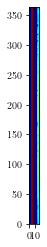

In [97]:
imshow=plt.imshow(daily_ann,cmap='jet',vmin=0,vmax=110,alpha=1,aspect='equal',origin='lower',)
imshow2=plt.imshow(daily_ann,cmap='jet',vmin=0,vmax=1000*10,alpha=1,aspect='equal',origin='lower')

In [98]:
# hourly_ann.to_csv('../../01_weather_data/03_imputing_process/ann_me.csv')
# hourly_sarima.to_csv('../../01_weather_data/03_imputing_process/sarima_me.csv')
# hourly_sarima.to_csv('../../01_weather_data/03_imputing_process/sarima2_me.csv')

In [99]:
daily_ann

,Direct,Global,Temperatura,Humedad,Presion,ws,wd,alturasolar,azimuth,prediccion,minutodia,me,mae,E_d,Ep_d,E_dmape,E_dmae
tiempo,,,,,,,,,,,,,,,,,
2018-01-01,220.257486,195.492938,21.073333,32.187431,87909.729097,1.876833,232.879993,-10.670860,-1.212602,195.492938,715.0,0.000000,0.000000,4691.830500,4691.830500,0.000000,0.000000
2018-01-02,249.352604,207.309604,19.813264,35.512986,87888.903403,2.001646,245.576264,-10.645264,1.175591,205.799962,715.0,-1.509642,10.429177,4975.430500,4939.199082,0.728207,36.231418
2018-01-03,218.005708,201.577778,19.910069,38.419931,87793.584931,1.763222,232.080507,-10.617430,1.064848,212.055688,715.0,10.477910,12.103737,4837.866667,5089.336512,5.197949,251.469845
2018-01-04,225.291653,204.092354,19.705417,38.755625,87825.970833,2.016458,256.483194,-10.587343,0.955274,206.592688,715.0,2.500334,8.390707,4898.216500,4958.224521,1.225099,60.008021
2018-01-05,218.616361,201.826986,20.782639,39.015347,87860.551181,1.749632,201.385174,-10.554984,0.846970,207.010984,715.0,5.183997,12.722002,4843.847667,4968.263606,2.568535,124.415939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,231.541889,196.064722,20.374861,38.395278,87352.120069,1.862326,228.803736,-10.765700,-0.641277,215.286654,715.0,19.221931,32.752020,4705.553333,5166.879686,9.803870,461.326353
2018-12-28,171.888389,187.886715,19.778750,38.683472,87485.302292,1.780937,240.314889,-10.751114,-0.756823,203.591402,715.0,15.704687,27.846076,4509.281167,4886.193646,8.358593,376.912480
2018-12-29,340.953819,221.295424,20.654167,37.877083,87510.554444,1.792576,257.010472,-10.734347,-0.871837,202.300600,715.0,-18.994824,20.976198,5311.090167,4855.214398,8.583469,455.875769


/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_19782/602837190.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{err}[\dfrac{W}{m^2}]$')
/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_19782/602837190.py:36: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{err}[\dfrac{W}{m^2}]$')


Text(-0.04999999999999999, 0.1, '(c)')

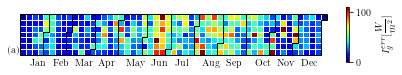

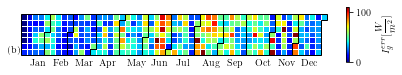

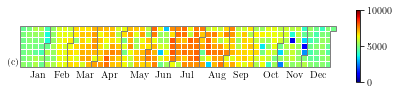

In [102]:
import calplot 

left, width = -1.3, -.2
right1=left+width
bottom, height = -.15, .25
top1 = bottom + height

left, width = -.25, .2
right2=left+width
bottom, height = -.15, .25
top2 = bottom + height

calplotsize=(5.8,1.3)
path_figures='../../../Tesis_repo/figures/'
calplot.calplot(daily_ann['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',
                vmin=0,vmax=110,edgecolor='black',linewidth=1,figsize=calplotsize,colorbar=False)
plt.colorbar(imshow,label='$I_g^{err}[\dfrac{W}{m^2}]$')
plt.text(right2, top2, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',)
plt.tight_layout()
plt.savefig(path_figures+'testyear_ann2.pdf')
#         transform=axs[1].transAxes)
# calplot.calplot(daily_sarima['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',
#                 vmin=0,vmax=100,edgecolor='black',linewidth=1,figsize=calplotsize,colorbar=False)
# plt.colorbar(imshow,label='$I_g^{err}[\dfrac{W}{m^2}]$')
# plt.text(right2, top2, '(b)',
#         horizontalalignment='right',
#         verticalalignment='bottom',)

# #         transform=axs[1].transAxes)
# plt.tight_layout()
# #plt.savefig(path_figures+'testyear_sarima.pdf')
calplot.calplot(daily_sarima2['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',
                vmin=0,vmax=110,edgecolor='black',linewidth=1,figsize=calplotsize,colorbar=False)
plt.colorbar(imshow,label='$I_g^{err}[\dfrac{W}{m^2}]$')
plt.text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',)
plt.tight_layout()
plt.savefig(path_figures+'testyear_sarima2.pdf')
calplot.calplot(daily_ann['E_d'],how='sum',cmap='jet',figsize=calplotsize,yearlabels=False,dayticks=False,
               vmin=0, vmax=10*1000)
plt.text(right2, top2, '(c)',
        horizontalalignment='right',
        verticalalignment='bottom',)


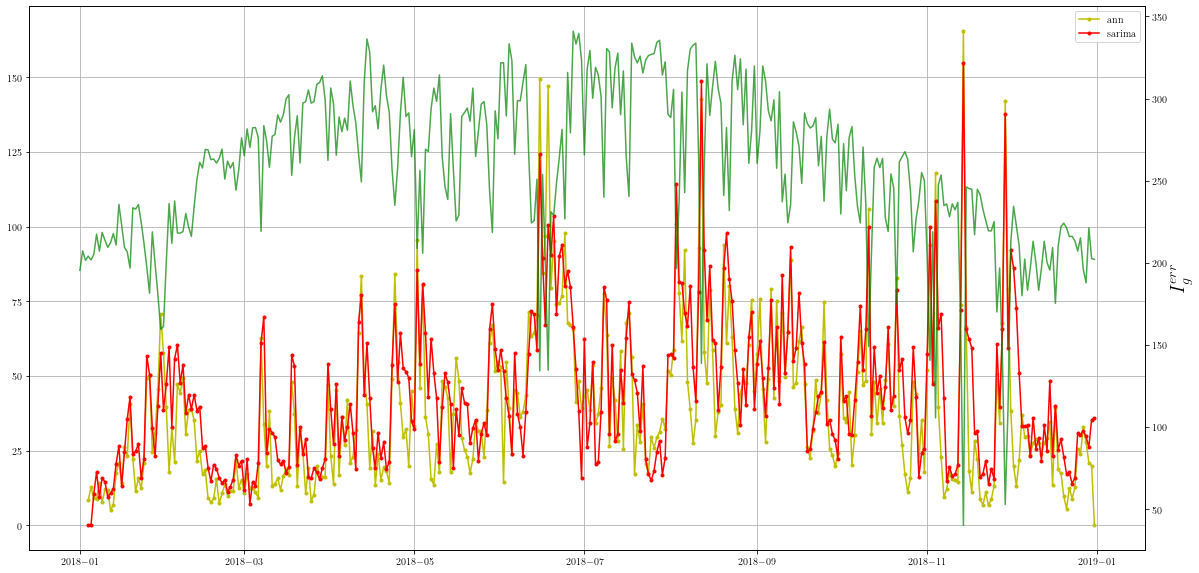

In [78]:
fig, ax= plt.subplots(figsize=(20,10))
# ax.plot(daily_ann['mae'],'b.-',label='ann')
# ax.plot(daily_sarima['mae'].loc['2018-01-04'::],'r.-',label='sarima')
ax.plot(daily_ann['mae'].loc['2018-01-04'::],'y.-',label='ann')
ax.plot(daily_sarima['mae'].loc['2018-01-04'::],'r.-',label='sarima')
ax2=ax.twinx()
#     ax2.plot(tmx_2018['Global'].resample('1D').sum(),'g.-',label='Global')
ax2.plot(tmx_2018['Global'].resample('D').mean(),'g-', alpha=.7)
ax.grid()
plt.xlabel('Tiempo',size=20)
plt.ylabel('$I_g^{err}$',size=20)
#     ax.set_ylim(0,70)
ax.legend()

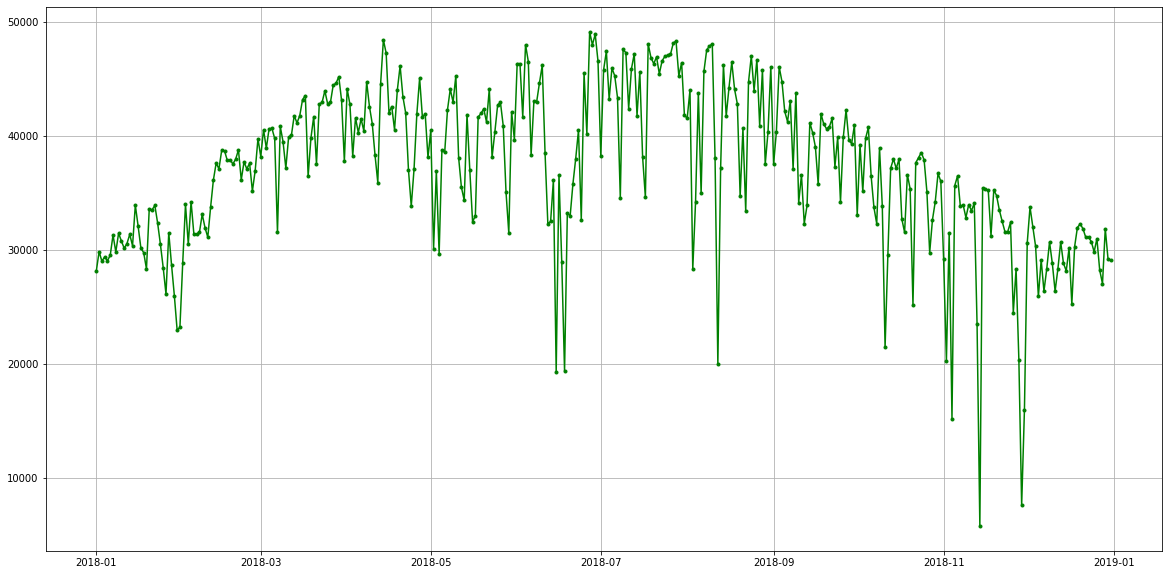

In [38]:
fig, ax= plt.subplots(figsize=(20,10))
ax.plot(tmx_2018['Global'].resample('1D').sum(),'g.-',label='Global')
ax.grid()


In [39]:
tmx_2018.Global.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of tiempo
2018-01-01 00:00:00    0.0
2018-01-01 00:10:00    0.0
2018-01-01 00:20:00    0.0
2018-01-01 00:30:00    0.0
2018-01-01 00:40:00    0.0
                      ... 
2018-12-31 23:10:00    0.0
2018-12-31 23:20:00    0.0
2018-12-31 23:30:00    0.0
2018-12-31 23:40:00    0.0
2018-12-31 23:50:00    0.0
Name: Global, Length: 52560, dtype: float64>

In [40]:
# days_mae=['2018-01-30', #maximo
# '2018-01-12', #minimo
# '2018-06-15',
# '2018-04-17',
# '2018-08-12',
# '2018-07-19',
# '2018-11-14',
# '2018-12-21',]
ms=[]
# day=0
# for day in range(0,8,1):
measured=np.stack(tmx_2018.loc['2018-01-05'::].Global)
predicted_ann=np.stack(ann_2018.loc['2018-01-05'::].Global)
predicted_sarima=np.stack(sarima_2018.loc['2018-01-05'::].Global)
reg_ann = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_ann)
b_ann=reg_ann.intercept_
m_ann=reg_ann.coef_
reg_sarima = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_sarima)
b_sarima=reg_sarima.intercept_
m_sarima=reg_sarima.coef_
ms.append(str(m_ann).replace('[','').replace(']',''))
ms.append(str(m_sarima).replace('[','').replace(']',''))
# np.array(m_ann,m_sarima)
# reg.fit()
# print(days_mae[day])
print('m_ann:',m_ann)
print('b_ann:',b_ann)
    
    

m_ann: [0.95479499]
b_ann: 16.55563807605847


In [41]:
print('m_ann:',m_ann)
print('b_ann:',b_ann)
print('m_sarima',m_sarima)
print('b_sarima',b_sarima)
x = np.linspace(1,1200)
y = 1 * x 
y_ann = m_ann * x +b_ann
y_sarima = m_sarima * x +b_sarima


m_ann: [0.95479499]
b_ann: 16.55563807605847
m_sarima [0.93987725]
b_sarima 14.54311600455236


In [42]:
r2s=[]
predict_ann = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_ann).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_ann = metrics.r2_score(predicted_ann,predict_ann)
predict_sarima = LinearRegression(fit_intercept=True).fit(measured.reshape(-1,1),predicted_sarima).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_sarima = metrics.r2_score(predicted_sarima,predict_sarima)
r2s.append(r2_ann)
r2s.append(r2_sarima)
print("ann R2 score", r2_ann)
print("SARIMA R2 score", r2_sarima)

ann R2 score 0.9383170877006237
SARIMA R2 score 0.9262348130956747


In [43]:
days_mae=['2018-01-30', #maximo
'2018-01-12', #minimo
'2018-06-15',
'2018-04-17',
'2018-08-12',
'2018-07-19',
'2018-11-14',
'2018-12-21',]
ann_2018.Global.loc[days_mae[0]]

tiempo
2018-01-30 00:00:00    0.0
2018-01-30 00:10:00    0.0
2018-01-30 00:20:00    0.0
2018-01-30 00:30:00    0.0
2018-01-30 00:40:00    0.0
                      ... 
2018-01-30 23:10:00    0.0
2018-01-30 23:20:00    0.0
2018-01-30 23:30:00    0.0
2018-01-30 23:40:00    0.0
2018-01-30 23:50:00    0.0
Name: Global, Length: 144, dtype: float64

In [44]:
params={'text.latex.preamble':'\\usepackage{lmodern,amsmath}',
       'text.usetex':True,
       'font.size':10,
       'font.family':'lmodern'}
# h_fmt=mdates.DateFormatter('%m-%d-%H')
plt.rcParams.update(params)

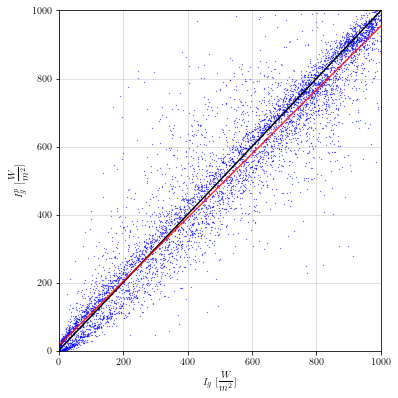

In [64]:
fig, ax=plt.subplots(figsize=(5.63,5.63))
ax.plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.5,alpha=1) #markersize=.25
plt.plot(x,y,'k',linewidth=1.5)
plt.plot(x,y_sarima,'r',linewidth=1.5,alpha=.8)
ax.set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
ax.set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1000)
ax.grid(alpha=.5)
plt.tight_layout()
# plt.savefig(path_figures+'linreg_sarima.png')


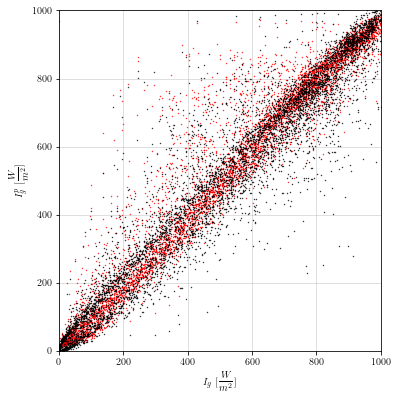

In [87]:
fig, ax=plt.subplots(figsize=(5.63,5.63))
# ax.plot(measured,predicted_sarima,'b.',markersize=.1)
# plt.scatter(measured,predicted_sarima)
ax.plot(measured[0:90*144],predicted_ann[0:90*144],'r.',markersize=.8,alpha=1)
ax.plot(measured[0:90*144],predicted_sarima[0:90*144],'k.',markersize=.8,alpha=1)
# plt.plot(x,y,'k',linewidth=1.5,alpha=1)
# plt.plot(x,y_ann,'r',linewidth=1.5,alpha=.8)
# plt.plot(x,y_sarima,'g',linewidth=1.5,alpha=.8)


plt.grid(alpha=.5)

ax.set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
ax.set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1000)
plt.tight_layout()
# plt.savefig(path_figures+'linreg_ann.png')
# plt.plot(ann_2018.Global)
# plt.plot(sarima_2018.Global)
# reg = LinearRegression().fit(X, y)

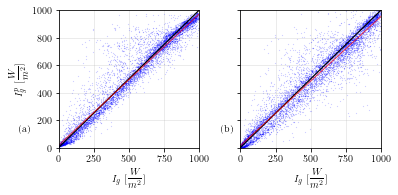

In [47]:
left, width = -.4, .2
right1=left+width
bottom, height = -.15, .25
top1 = bottom + height

left, width = -.25, .2
right2=left+width
bottom, height = -.15, .25
top2 = bottom + height





size=(5.63,5.63/2)
fig,axs =plt.subplots(1,2, figsize=size,sharey=True)
axs[0].plot(measured[0:90*144],predicted_ann[0:90*144],'b.',markersize=.28,alpha=.5)
axs[0].plot(x,y,'k',linewidth=1.2,alpha=1)
axs[0].plot(x,y_ann,'r',linewidth=1,alpha=.7)
axs[0].grid(alpha=.3)
axs[0].set_ylim(0,1000)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
axs[0].text(right1, top1, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=axs[0].transAxes)
axs[1].plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.28,alpha=.5)
axs[1].plot(x,y,'k',linewidth=1.2,alpha=1)
axs[1].plot(x,y_sarima,'r',linewidth=1,alpha=.7)
axs[1].grid(alpha=.3)
axs[1].set_ylim(0,1000)
axs[1].set_xlim(0,1000)
axs[1].set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
axs[0].set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
axs[1].text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=axs[1].transAxes)
plt.tight_layout()
# plt.savefig(path_figures+'linreg.jpg',dpi=200)

In [48]:
def mean_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.me.mean()
    return(dfmindia.mae,dfmindia.me)

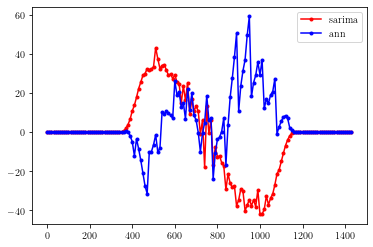

In [49]:
mae_sarima,me_sarima=mean_error_day(hourly_sarima)
mae_ann,me_ann=mean_error_day(hourly_ann)
plt.plot(me_sarima,'r.-',label='sarima')
plt.plot(me_ann,'b.-',label='ann')
plt.legend()

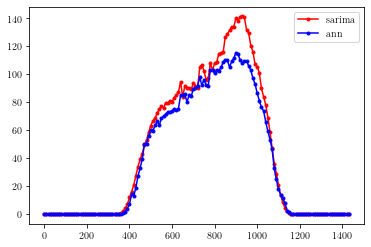

In [50]:
plt.plot(mae_sarima,'r.-',label='sarima')
plt.plot(mae_ann,'b.-',label='ann')
plt.legend()

In [53]:

metricas=['model','E_dmae','E_dmape','mae_Ig','$m$','$R^2$']
dfr2s=pd.DataFrame((r2s),columns=['$R^2$'])
dfms=pd.DataFrame((ms),columns=['$m$'])
linreg=pd.concat((dfms,dfr2s),axis=1)
df_allmetrics=pd.concat((df_metrics,linreg),axis=1)
df_allmetrics[metricas]

,model,E_dmae,E_dmape,mae_Ig,$m$,$R^2$
0,CNN-LSTM,530.044127,11.204879,76.355088,0.95479499,0.938317
1,"SARIMA(0,1,1)",606.641714,12.130787,86.432810,0.93987725,0.926235
2,"SARIMA(0,1,0)(0,1,1)",606.641714,12.130787,86.432810,NaN,NaN


In [58]:
len(sarima_2018.loc['2018-01-05'::].Global)/(100*144)

3.61